## Indoor Object Detection
This project aims to perform indoor object detection using YOLOV8 model. The project utilizes several Python libraries, including roboflow, ultralytics, numpy, and torch.

## Dataset Download:
The dataset can be downloaded from the following link: [Roboflow Dataset - all_finalize (Version 3)](https://universe.roboflow.com/so-d4hcz/all_finalize/dataset/3/download)


## Installing Necessary Libraries

In [ ]:
!pip install roboflow

In [ ]:
!pip install ultralytics

## Downloading the dataset

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="adjdjhjijdisjudsnish")
project = rf.workspace("so-d4hcz").project("all_finalize")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.66, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to all_finalize--3 in yolov8:: 100%|██████████| 12566/12566 [00:02<00:00, 5236.12it/s]


In [5]:
train_images_path = '/content/all_finalize--3/train/images'
train_labels_path = '/content/all_finalize--3/train/labels'
val_images_path = '/content/all_finalize--3/valid/images'
val_labels_path = '/content/all_finalize--3/valid/labels'
test_images_path = '/content/all_finalize--3/test/images'
test_labels_path = '/content/all_finalize--3/test/labels'

## Importing Necessary Libraries

In [33]:
from ultralytics import YOLO
import os
import torch
import numpy as np
import cv2
import glob
import os
from google.colab.patches import cv2_imshow

In [34]:
# Function to count unique classes in a directory of label files
def count_unique_classes(labels_directory):
    unique_class_ids = set()

    for root, _, files in os.walk(labels_directory):
        for file in files:
            file_path = os.path.join(root, file)
            with open(file_path, 'r') as file_content:
                # Read class IDs from label file and add to the set of unique IDs
                class_ids = [line.strip().split()[0] for line in file_content]
                unique_class_ids.update(map(int, class_ids))

    return len(unique_class_ids)

# Paths to label directories
training_labels_path = '/content/all_finalize--3/train/labels'
validation_labels_path = '/content/all_finalize--3/valid/labels'
testing_labels_path = '/content/all_finalize--3/test/labels'

# Counting unique classes in each dataset
num_train_classes = count_unique_classes(training_labels_path)
num_val_classes = count_unique_classes(validation_labels_path)
num_test_classes = count_unique_classes(testing_labels_path)

print(f"Total number of classes in the training set: {num_train_classes}")
print(f"Total number of classes in the validation set: {num_val_classes}")
print(f"Total number of classes in the test set: {num_test_classes}")


Total number of classes in the training set: 6
Total number of classes in the validation set: 6
Total number of classes in the test set: 6


In [ ]:
# Function to verify and correct label IDs in label files if they exceed the defined number of classes
def validate_and_correct_labels(labels_directory, max_classes):
    for root, _, files in os.walk(labels_directory):
        for file in files:
            file_path = os.path.join(root, file)
            with open(file_path, 'r') as file_content:
                lines = file_content.readlines()
                label_entries = [line.strip().split() for line in lines]
                corrected_labels = []

                for entry in label_entries:
                    class_id = int(entry[0])
                    if class_id >= max_classes:
                        print(f"Adjusting {file_path}: Class ID {class_id} is higher than the maximum allowed {max_classes}.")
                        entry[0] = str(max_classes - 1)
                    corrected_labels.append(' '.join(entry))

            with open(file_path, 'w') as file_content:
                file_content.write('\n'.join(corrected_labels))

# Number of classes in the dataset
total_classes = 6

# Correcting labels in all datasets
validate_and_correct_labels('/content/all_finalize--3/train/labels', total_classes)
validate_and_correct_labels('/content/all_finalize--3/valid/labels', total_classes)
validate_and_correct_labels('/content/all_finalize--3/test/labels', total_classes)

## Defining the YAML configuration for the dataset

In [8]:
# Defining the YAML configuration for dataset paths, class count, and class names
data_yaml = """
train: /content/all_finalize--3/train
val: /content/all_finalize--3/valid

nc: 6
names: ['AC','Bathtub','Bed','Bed Frame','Closet','Cupboard']
"""
with open('data.yaml', 'w') as f:
    f.write(data_yaml)

## Loading the YOLOv8 Model and Executing Training

In [9]:
model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:02<00:00, 8.54MB/s]


In [ ]:
model.train(data='data.yaml', epochs=50, imgsz=228, batch=64, device='0')

## Evaluating Validation Metrics for the YOLOv8 Model

In [13]:
metrics = model.val(data='data.yaml')
print("Validation Metrics: ", metrics)

Ultralytics YOLOv8.2.66 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/all_finalize--3/valid/labels.cache... 520 images, 178 backgrounds, 0 corrupt: 100%|██████████| 520/520 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.00s/it]


                   all        520       1325      0.662      0.431      0.508      0.361
                    AC         49         53      0.327      0.264      0.311      0.202
               Bathtub         46         46        0.5      0.935      0.822      0.687
                   Bed         16         16       0.59      0.688      0.685      0.437
             Bed Frame          7          7      0.884      0.143      0.381      0.285
                Closet         15         16          1          0      0.237      0.144
              Cupboard        304       1187      0.675      0.554      0.613      0.413
Speed: 0.0ms preprocess, 2.7ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train222
Validation Metrics:  ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7883c96409d0>


## Saving the results

In [39]:
results_dir = '/content/predictions'
os.makedirs(results_dir, exist_ok=True)
try:
    results = model.predict(source=test_images_path, save=True, save_dir=results_dir, verbose=False)
    print(f"Test results saved to: {results_dir}")
except RuntimeError as e:
    print(f"Testing failed: {e}")

Results saved to runs/detect/train228
Test results saved to: /content/predictions


## Displaying one test image with bounding boxes

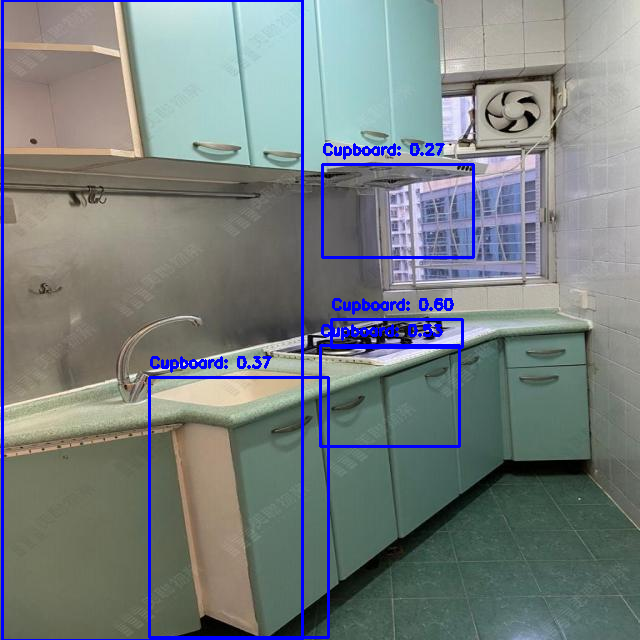

In [32]:
def draw_boxes(img, boxes, class_names):
    for box in boxes:
        x1, y1, x2, y2 = map(int, box[:4])
        score = box[4]
        class_id = int(box[5])
        label = class_names[class_id]
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(img, f"{label}: {score:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    return img

def get_predictions(model, images_path):
    results = model.predict(source=images_path, save=False, verbose=False)
    return results

test_images_path = '/content/all_finalize--3/test/images'
test_images = glob.glob(os.path.join(test_images_path, '*.jpg'))
results = get_predictions(model, test_images_path)
class_names = model.names

if test_images:
    img_path = test_images[4]  # Display the first image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load image {img_path}")
    else:
        boxes = results[0].boxes.data.cpu().numpy() if len(results[0].boxes) > 0 else []
        img_with_boxes = draw_boxes(img, boxes, class_names)
        cv2_imshow(img_with_boxes)
else:
    print("No test images found.")